# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

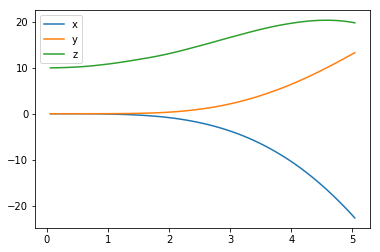

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

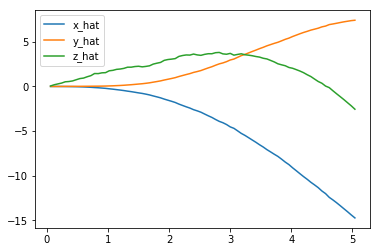

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

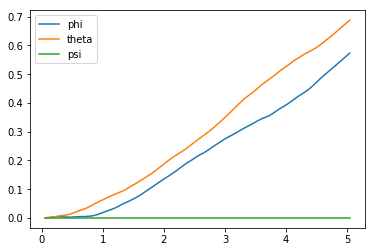

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

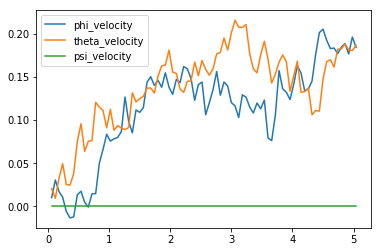

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

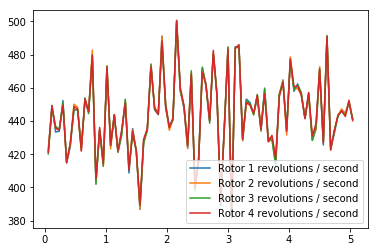

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-22.69964529  13.30678494  19.81864675   0.57345858   0.68775491
   0.        ]
[-14.71670059   7.4129786   -2.54670507]
[0.18423759 0.1865403  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.131 (best =   0.150), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## Train agent using DDPG (Deep Deterministic Policy Gradient)

import tensorflow as tf
import numpy as np
import argparse
import pprint as pp
import matplotlib.pylab as plt

import sys
from takeoff import Takeoff_Task
from agents.agent_ddpg import ActorNetwork, CriticNetwork
from agents.replay_buffer import ReplayBuffer
from agents.noise import OUActionNoise

# ===========================
#   Tensorflow Summary Ops
# ===========================

def build_summaries():
    episode_reward = tf.Variable(0.)
    tf.summary.scalar("Reward", episode_reward)
    episode_ave_max_q = tf.Variable(0.)
    tf.summary.scalar("Qmax Value", episode_ave_max_q)

    summary_vars = [episode_reward, episode_ave_max_q]
    summary_ops = tf.summary.merge_all()

    return summary_ops, summary_vars

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / N

# ===========================
#   Agent Training
# ===========================

def train(sess, env, args, actor, critic, actor_noise, rewards_list):

    # Set up summary Ops
    summary_ops, summary_vars = build_summaries()

    sess.run(tf.global_variables_initializer())

    # Initialize target network weights
    actor.update_target_network()
    critic.update_target_network()

    # Initialize replay memory
    replay_buffer = ReplayBuffer(int(args['BUFFER_SIZE']), int(args['RANDOM_SEED']))

    # Needed to enable BatchNorm. 
    # This hurts the performance on Pendulum but could be useful
    # in other environments.
    # tflearn.is_training(True)

    for i in range(int(args['MAX_EPISODES'])):

        s = env.reset()

        ep_reward = 0
        ep_ave_max_q = 0

        for j in range(int(args['MAX_EPISODE_LEN'])):

            # Added exploration noise
            a = actor.predict(np.reshape(s, (1, actor.s_dim))) + actor_noise()

            s2, r, terminal = env.step(a[0])

            replay_buffer.add(np.reshape(s, (actor.s_dim,)), np.reshape(a, (actor.a_dim,)), r,
                              terminal, np.reshape(s2, (actor.s_dim,)))

            # Keep adding experience to the memory until
            # there are at least minibatch size samples
            if replay_buffer.size() > int(args['MINIBATCH_SIZE']):
                s_batch, a_batch, r_batch, t_batch, s2_batch = \
                    replay_buffer.sample_batch(int(args['MINIBATCH_SIZE']))

                # Calculate targets
                target_q = critic.predict_target(
                    s2_batch, actor.predict_target(s2_batch))

                y_i = []
                for k in range(int(args['MINIBATCH_SIZE'])):
                    if t_batch[k]:
                        y_i.append(r_batch[k])
                    else:
                        y_i.append(r_batch[k] + critic.gamma * target_q[k])

                # Update the critic given the targets
                # predicted_q_value, _ = critic.train(
                predicted_q_value = critic.train(
                    s_batch, a_batch, np.reshape(y_i, (int(args['MINIBATCH_SIZE']), 1)))

                ep_ave_max_q += np.amax(predicted_q_value)

                # Update the actor policy using the sampled gradient
                a_outs = actor.predict(s_batch)
                grads = critic.action_gradients(s_batch, a_outs)
                actor.train(s_batch, grads[0])

                # Update target networks
                actor.update_target_network()
                critic.update_target_network()

            s = s2
            ep_reward += r

            if terminal:

                summary_str = sess.run(summary_ops, feed_dict={
                    summary_vars[0]: ep_reward,
                    summary_vars[1]: ep_ave_max_q / float(j)
                })

                print('| Reward: {:d} | Episode: {:d} | Qmax: {:.4f}'.format(int(ep_reward), \
                        i, (ep_ave_max_q / float(j))))
                rewards_list.append((i, ep_reward))
                break

Using TensorFlow backend.


In [11]:
args = {
    'ACTOR_LR': 0.0001,               # actor network learning rate
    'CRITIC_LR': 0.001,               # critic network learning rate
    'GAMMA': 0.99,                    # discount factor for critic updates
    'TAU': 0.001,                     # soft target update parameter
    'BUFFER_SIZE': 1000000,           # max size of the replay buffer
    'MINIBATCH_SIZE': 64,             # size of minibatch for minibatch-SGD

    'RANDOM_SEED': 1234,              # random seed for repeatability
    'MAX_EPISODES': 1000,             # max num of episodes to do while training
    'MAX_EPISODE_LEN': 1000           # max length of 1 episode
}

rewards_list = []

with tf.Session() as sess:

    target_pos = np.array([10., 10., 10.])
    init_pose = np.array([0., 0., 0.1, 0., 0., 0.])  # initial pose

    env = Takeoff_Task(init_pose, target_pos=target_pos)
    np.random.seed(int(args['RANDOM_SEED']))
    tf.set_random_seed(int(args['RANDOM_SEED']))

    state_dim = env.state_size
    action_dim = env.action_size
    action_bound = env.action_high

    actor = ActorNetwork(sess, state_dim, action_dim, action_bound,
                         float(args['ACTOR_LR']), float(args['TAU']),
                         int(args['MINIBATCH_SIZE']))

    critic = CriticNetwork(sess, state_dim, action_dim,
                           float(args['CRITIC_LR']), float(args['TAU']),
                           float(args['GAMMA']))

    actor_noise = OUActionNoise(mu=np.zeros(action_dim), sigma=0.2)

    train(sess, env, args, actor, critic, actor_noise, rewards_list)


INFO:tensorflow:Summary name Qmax Value is illegal; using Qmax_Value instead.
| Reward: -90 | Episode: 0 | Qmax: 0.0000
| Reward: -89 | Episode: 1 | Qmax: 6.9427
| Reward: -94 | Episode: 2 | Qmax: 1.2419
| Reward: -21 | Episode: 3 | Qmax: 0.6156
| Reward: -17 | Episode: 4 | Qmax: 0.8470
| Reward: -21 | Episode: 5 | Qmax: 0.7776
| Reward: -23 | Episode: 6 | Qmax: 0.8113
| Reward: -66 | Episode: 7 | Qmax: 0.5990
| Reward: -29 | Episode: 8 | Qmax: 0.4639
| Reward: -37 | Episode: 9 | Qmax: 0.4728
| Reward: -41 | Episode: 10 | Qmax: 0.4815
| Reward: -42 | Episode: 11 | Qmax: 0.4070
| Reward: -36 | Episode: 12 | Qmax: 0.4319
| Reward: -35 | Episode: 13 | Qmax: 0.3863
| Reward: -24 | Episode: 14 | Qmax: 0.3647
| Reward: -24 | Episode: 15 | Qmax: 0.3835
| Reward: -17 | Episode: 16 | Qmax: 0.3753
| Reward: -19 | Episode: 17 | Qmax: 0.3943
| Reward: -12 | Episode: 18 | Qmax: 0.4969
| Reward: -13 | Episode: 19 | Qmax: 0.4612
| Reward: -12 | Episode: 20 | Qmax: 0.5954
| Reward: -13 | Episode: 21 |

| Reward: -9 | Episode: 190 | Qmax: 0.5399
| Reward: -9 | Episode: 191 | Qmax: 0.6484
| Reward: -9 | Episode: 192 | Qmax: 0.5034
| Reward: -9 | Episode: 193 | Qmax: 0.6381
| Reward: -8 | Episode: 194 | Qmax: 0.7270
| Reward: -8 | Episode: 195 | Qmax: 0.6050
| Reward: -8 | Episode: 196 | Qmax: 0.5805
| Reward: -8 | Episode: 197 | Qmax: 0.6542
| Reward: -8 | Episode: 198 | Qmax: 0.6681
| Reward: -8 | Episode: 199 | Qmax: 0.4834
| Reward: -8 | Episode: 200 | Qmax: 1.0527
| Reward: -8 | Episode: 201 | Qmax: 0.7880
| Reward: -8 | Episode: 202 | Qmax: 0.9403
| Reward: -8 | Episode: 203 | Qmax: 0.6003
| Reward: -8 | Episode: 204 | Qmax: 0.7102
| Reward: -8 | Episode: 205 | Qmax: 1.0202
| Reward: -8 | Episode: 206 | Qmax: 0.7179
| Reward: -8 | Episode: 207 | Qmax: 0.9006
| Reward: -8 | Episode: 208 | Qmax: 0.6319
| Reward: -8 | Episode: 209 | Qmax: 0.6550
| Reward: -8 | Episode: 210 | Qmax: 0.7637
| Reward: -12 | Episode: 211 | Qmax: 0.5872
| Reward: -12 | Episode: 212 | Qmax: 0.5821
| Reward:

| Reward: -9 | Episode: 381 | Qmax: 1.0283
| Reward: -9 | Episode: 382 | Qmax: 0.6297
| Reward: -9 | Episode: 383 | Qmax: 0.6968
| Reward: -9 | Episode: 384 | Qmax: 0.5726
| Reward: -9 | Episode: 385 | Qmax: 0.5291
| Reward: -9 | Episode: 386 | Qmax: 0.4667
| Reward: -9 | Episode: 387 | Qmax: 0.7979
| Reward: -9 | Episode: 388 | Qmax: 0.4684
| Reward: -9 | Episode: 389 | Qmax: 0.7917
| Reward: -9 | Episode: 390 | Qmax: 0.9547
| Reward: -9 | Episode: 391 | Qmax: 0.6727
| Reward: -9 | Episode: 392 | Qmax: 0.9395
| Reward: -9 | Episode: 393 | Qmax: 0.6446
| Reward: -9 | Episode: 394 | Qmax: 0.6134
| Reward: -9 | Episode: 395 | Qmax: 0.6692
| Reward: -9 | Episode: 396 | Qmax: 0.6929
| Reward: -9 | Episode: 397 | Qmax: 0.5927
| Reward: -9 | Episode: 398 | Qmax: 0.4678
| Reward: -9 | Episode: 399 | Qmax: 0.6230
| Reward: -9 | Episode: 400 | Qmax: 0.7180
| Reward: -9 | Episode: 401 | Qmax: 0.4724
| Reward: -9 | Episode: 402 | Qmax: 0.6817
| Reward: -9 | Episode: 403 | Qmax: 0.6483
| Reward: -

| Reward: -9 | Episode: 573 | Qmax: 0.6790
| Reward: -9 | Episode: 574 | Qmax: 0.4780
| Reward: -9 | Episode: 575 | Qmax: 0.5956
| Reward: -9 | Episode: 576 | Qmax: 0.4837
| Reward: -9 | Episode: 577 | Qmax: 0.3189
| Reward: -9 | Episode: 578 | Qmax: 0.5809
| Reward: -9 | Episode: 579 | Qmax: 0.5082
| Reward: -9 | Episode: 580 | Qmax: 0.4218
| Reward: -9 | Episode: 581 | Qmax: 0.4751
| Reward: -9 | Episode: 582 | Qmax: 0.4390
| Reward: -9 | Episode: 583 | Qmax: 0.7264
| Reward: -9 | Episode: 584 | Qmax: 0.4158
| Reward: -9 | Episode: 585 | Qmax: 0.8370
| Reward: -9 | Episode: 586 | Qmax: 1.0461
| Reward: -9 | Episode: 587 | Qmax: 0.3696
| Reward: -9 | Episode: 588 | Qmax: 0.6224
| Reward: -9 | Episode: 589 | Qmax: 0.8216
| Reward: -9 | Episode: 590 | Qmax: 0.9083
| Reward: -9 | Episode: 591 | Qmax: 0.5910
| Reward: -9 | Episode: 592 | Qmax: 0.6126
| Reward: -9 | Episode: 593 | Qmax: 0.3502
| Reward: -9 | Episode: 594 | Qmax: 0.7057
| Reward: -9 | Episode: 595 | Qmax: 0.4638
| Reward: -

| Reward: -9 | Episode: 764 | Qmax: 0.5530
| Reward: -9 | Episode: 765 | Qmax: 0.4683
| Reward: -9 | Episode: 766 | Qmax: 0.5221
| Reward: -9 | Episode: 767 | Qmax: 0.6012
| Reward: -9 | Episode: 768 | Qmax: 0.3795
| Reward: -9 | Episode: 769 | Qmax: 0.5945
| Reward: -9 | Episode: 770 | Qmax: 0.3950
| Reward: -9 | Episode: 771 | Qmax: 0.2924
| Reward: -9 | Episode: 772 | Qmax: 0.5952
| Reward: -9 | Episode: 773 | Qmax: 0.4143
| Reward: -9 | Episode: 774 | Qmax: 0.4520
| Reward: -9 | Episode: 775 | Qmax: 0.4285
| Reward: -9 | Episode: 776 | Qmax: 0.4808
| Reward: -9 | Episode: 777 | Qmax: 0.5197
| Reward: -9 | Episode: 778 | Qmax: 0.4411
| Reward: -9 | Episode: 779 | Qmax: 0.3379
| Reward: -9 | Episode: 780 | Qmax: 0.7044
| Reward: -9 | Episode: 781 | Qmax: 0.6125
| Reward: -9 | Episode: 782 | Qmax: 0.6122
| Reward: -9 | Episode: 783 | Qmax: 0.6760
| Reward: -9 | Episode: 784 | Qmax: 0.4544
| Reward: -9 | Episode: 785 | Qmax: 0.3675
| Reward: -9 | Episode: 786 | Qmax: 0.5607
| Reward: -

| Reward: -8 | Episode: 955 | Qmax: 0.7513
| Reward: -8 | Episode: 956 | Qmax: 0.8311
| Reward: -9 | Episode: 957 | Qmax: 0.8243
| Reward: -9 | Episode: 958 | Qmax: 0.8848
| Reward: -9 | Episode: 959 | Qmax: 0.7177
| Reward: -9 | Episode: 960 | Qmax: 0.9210
| Reward: -9 | Episode: 961 | Qmax: 0.9533
| Reward: -9 | Episode: 962 | Qmax: 0.5327
| Reward: -9 | Episode: 963 | Qmax: 1.0053
| Reward: -9 | Episode: 964 | Qmax: 0.3889
| Reward: -8 | Episode: 965 | Qmax: 0.9824
| Reward: -8 | Episode: 966 | Qmax: 0.7182
| Reward: -8 | Episode: 967 | Qmax: 0.6057
| Reward: -8 | Episode: 968 | Qmax: 0.9318
| Reward: -8 | Episode: 969 | Qmax: 0.7471
| Reward: -8 | Episode: 970 | Qmax: 0.9957
| Reward: -9 | Episode: 971 | Qmax: 1.0127
| Reward: -9 | Episode: 972 | Qmax: 0.8143
| Reward: -9 | Episode: 973 | Qmax: 0.6545
| Reward: -9 | Episode: 974 | Qmax: 0.8021
| Reward: -9 | Episode: 975 | Qmax: 0.3682
| Reward: -9 | Episode: 976 | Qmax: 0.6257
| Reward: -8 | Episode: 977 | Qmax: 0.6566
| Reward: -

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

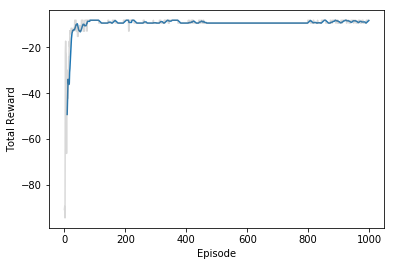

In [12]:
## Plot the rewards.
eps, rews = np.array(rewards_list).T

smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I chose to have an agent control the Quadcopter to successfully take off. I implemented the agent code in `takeoff.py`, in the class Takeoff_Task.

The task supports a few initialization parameters, which describe an initial `pose` of the Quadcopter as well as a target position. Useful defaults are provided for all parameters.

The reward function is based mainly on measurements in the z-direction of the coordinate system. The function begins by penalizing for distance (in the z-direction) the copter is away from the target position. It further penalizes if the copter has risen above the target position, since that is not desired for the takeoff task. The resulting penalty is normalized to the overall distance to be traveled in the z-direction, then scaled using 'tanh'.

As a final check, the reward function checks for a 'crash' condition. It returns a large negative value (high penalty) in this situation.

For state, the Takeoff_Task uses 3 frames of the pose (position in (x, y, z) dimensions and the Euler angles) of the Quadcopter. The action is comprised of rotor speeds the agent provides in order to control the Quadcopter.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I began by implementing an agent using Deep Q learning. Before getting too far, I read the advice offered on the Forum about using Policy Gradients to address this project. That's when I realized I had to do some research on DDPG (Deep Deterministic Policy Gradient).

My first attempt at a DDPG agent was based on the starter code provided in the project materials. I got the RL program to run, but I couldn't get the agent's learning to converge - at least not within a reasonable period of time. Sometimes I would see the rewards get worse with time. Since I was also working on the reward function at the same time as tuning the NN, I didn't have a strong intuition about why I was facing so much difficulty.

I looked again to the Forum for help, and came upon a pointer to a DDPG blog post from Patrick Emami. I decided to just run Patrick's code against my task, and observe the results. This was a huge turning point toward my completing this project! I saw the agent learning to conduct a takeoff task of the Quadcopter within a very short period of time.

I felt I needed to understand why Patrick's code was working for my task. The way I chose to do this was to convert his program from using tflearn to keras. I am new to TensorFlow in general, and felt this would help me understand the architecture of the model, as well as the hyperparameters used by the model.

In converting the program, I identified some mistakes I had made in my original implementation. Some were small, and innocuous. There was one however, where I had used a tanh activation function whereas the action range required a sigmoid!

In the end, I used an Actor Critic Policy Gradient architecture for my Reinforcement Learning problem. The network is almost exactly as described in Section 7 of the paper http://arxiv.org/pdf/1509.02971v2.pdf.

For convenience I am repeating the relevant information here:

We used Adam for learning the neural network parameters with a learning rate of 10^-4 and 10^-3 for the actor and critic respectively. For Q we included L2 weight decay of 10^-2 and used a discount factor of gamma = 0.99. For the soft target updates we used tau = 0:001. The neural networks used the rectified non-linearity for all hidden layers. The final output layer of the actor was a sigmoid layer, to bound the actions. The networks had 2 hidden layers with 400 and 300 units respectively (~ 130,000 parameters). Actions were not included until the 2nd hidden layer of Q. The final layer weights and biases of both the actor and critic were initialized from a uniform distribution (-3*10^-3; 3*10^-3). This was to ensure the initial outputs for the policy and value estimates were near zero. The other layers were also initialized from uniform distributions. The actions were not included until the fully-connected layers. We trained with minibatch sizes of 64. We used a replay buffer size of 10^6.

For the exploration noise process we used temporally correlated noise in order to explore well in physical environments that have momentum. We used an Ornstein-Uhlenbeck process (Uhlenbeck & Ornstein, 1930) with theta = 0.15 and sigma = 0.2. The Ornstein-Uhlenbeck process models the velocity of a Brownian particle with friction, which results in temporally correlated values centered around 0.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The Takeoff task is one of the easiest tasks an agent controlling a Quadcopter could learn. Once the RL architecture was set up correctly, a training exercise with 1,000 episodes ran fairly quickly even on a CPU. The training would stabilize within 200 episodes, and the time taken per episode would fall sharply. In an exercise with 1,000 episodes, the rewards would rise quickly, and essentially remain flat after 200 episodes.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I remember feeling challenged by the first project in this Nanodegree. Projects 2, 3 and 4 felt much easier when compared with 1. This project picked the level of challenge back up, considerably.

Perhaps because the starter code was not even mentioned in the Project intro, I did not even notice that we were being nudged in the direction of a DDPG architecture. I went down the path of trying to complete this project using DQN. That's my bad, of course, and I spent more time on this project than I had anticipated. But I can say I came away learning a lot!

Some thoughts from working on the project:
- Having the ability to modify the task/environment gives us a significant advantage. For example, including current velocity in the state allows the agent to learn much quicker.
- I am intrigued to learn about practical implications of Continous Reinforcement Learning problems.